# Classificação de Cogumelos - Árvore de classificação

## Projeto: mushroom-classification
------

### Sobre o projeto

Esse projeto é baseado em uma base de dados disponibilizado para análise na plataforma Kaggle, e pode ser encontrado em sua íntegra [nesse link](https://www.kaggle.com/uciml/mushroom-classification). Essa base de dados foi doada ao UCI Machine Learning em 27 de Abril de 1987.

### Sobre os dados

Os dados disponibilizados em sua primeira versão, tiveram diversas características para tornarem possível a classificação dos cogumelos em 4 tipos de riscos.

- Comestível
- Definitivamente venenoso
- Desconhecido
- Não recomendado

Segundo as explicações no Kaggle, as classificações 'Não recomendado' e 'Definitivamente venenoso' foram unidas em uma mesma classificação de 'venenoso'.

### Objetivos principais

- O projeto tem como principais objetivos explorar a base de dados juntamente com o uso de Árvores de Classificação Decisoria a fim de desenvolver habilidades de aprendizado de máquina.
- Identificar quais as principais características que influenciam na decisão de classificar um cogumelo como venenoso.

### Visualizando os Dados

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [10]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Num primeiro momento, podemos perceber que a base de dados esta sem problemas de linhas extras de cabeçalho, ou colunas de numeração. Também conseguimos visualizar nossa coluna alvo, 'class'.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

Percebemos também que não há nessa base, dados nulos. Porém, uma importante observação é que todos os dados são classificados com letras. Sendo aqui representados por object.

In [12]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Base de dados equilibrada

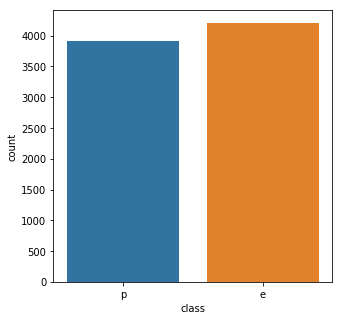

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
sbn.countplot(data=df,x='class')

Podemos perceber que a quantidade de cogumelos classificados como 'p' (venenoso) e 'e' (comestível) é bastante equilibrada, o que poderá possibilitar um aprendizado mais assertivo.

### Construção do modelo

A primeira coisa que devemos fazer, é tratar os dados que estão dispostos através de letras. O que dificulta que a árvore decisória interprete os dados e tire conclusões através da criação do modelo.

### Conjunto (X,y)

Primeiramente faremos a separação das colunas de características e da coluna alvo, o que facilitará o uso da árvore logo em seguida.

In [54]:
X_df = df.drop('class',axis=1)
y_df = df['class']

Para resolver o problema dos dados estarem classificados através de letras, iremos utilizar a função __get_dummies__ disponibilizada pela biblioteca __Pandas__

In [55]:
X = pd.get_dummies(X_df).values
y = y_df.values

### Separar o conjunto de treinamento e o conjunto de teste

Utilizando da função __train_test_split__, faremos a separação dos dados para testes e dos dados que serão utilizados para o treinamento do modelo.

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

### Criação do modelo

Para a criação do modelo, usaremos a __DecisionTreeClassifier__ disponibilizada pela biblioteca [Scikit-learn](https://scikit-learn.org).

In [60]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Tendo nosso modelo baseado em Árvore de decisões, podemos utilizar do X_test para realizar a previsão com base no treinamento realizado

In [62]:
y_pred = clf.predict(X_test)

Através das funçoes __accuracy_score__ e __confusion_matrix__ também da biblioteca Scikit-learn, podemos verificar a assertividade e representar graficamente através da matriz de confusão, os resultados da previsão do nosso modelo.

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [89]:
print("Acurácia: "+str(accuracy_score(y_test, y_pred)))

Acurácia: 1.0


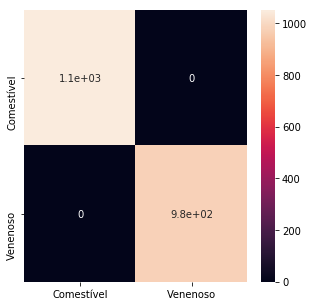

In [73]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sbn.heatmap(cm,xticklabels=['Comestível','Venenoso'],yticklabels=['Comestível','Venenoso'],annot=True)

Podemos ver que nosso modelo teve 100% de acerto, e que a matriz de confusão mostra graficamente isso. Vale lembrar que a classificação de cogumelos é um exemplo clássico para o aprendizado de máquina, sendo uma prova de que a árvore decisória pode ser uma boa opção.

### Mas e a nossa árvore?

Para visualizar a árvore decisória formada, podemos utilizar de algumas bibliotecas para renderizar uma imagem com as decisões.

In [74]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

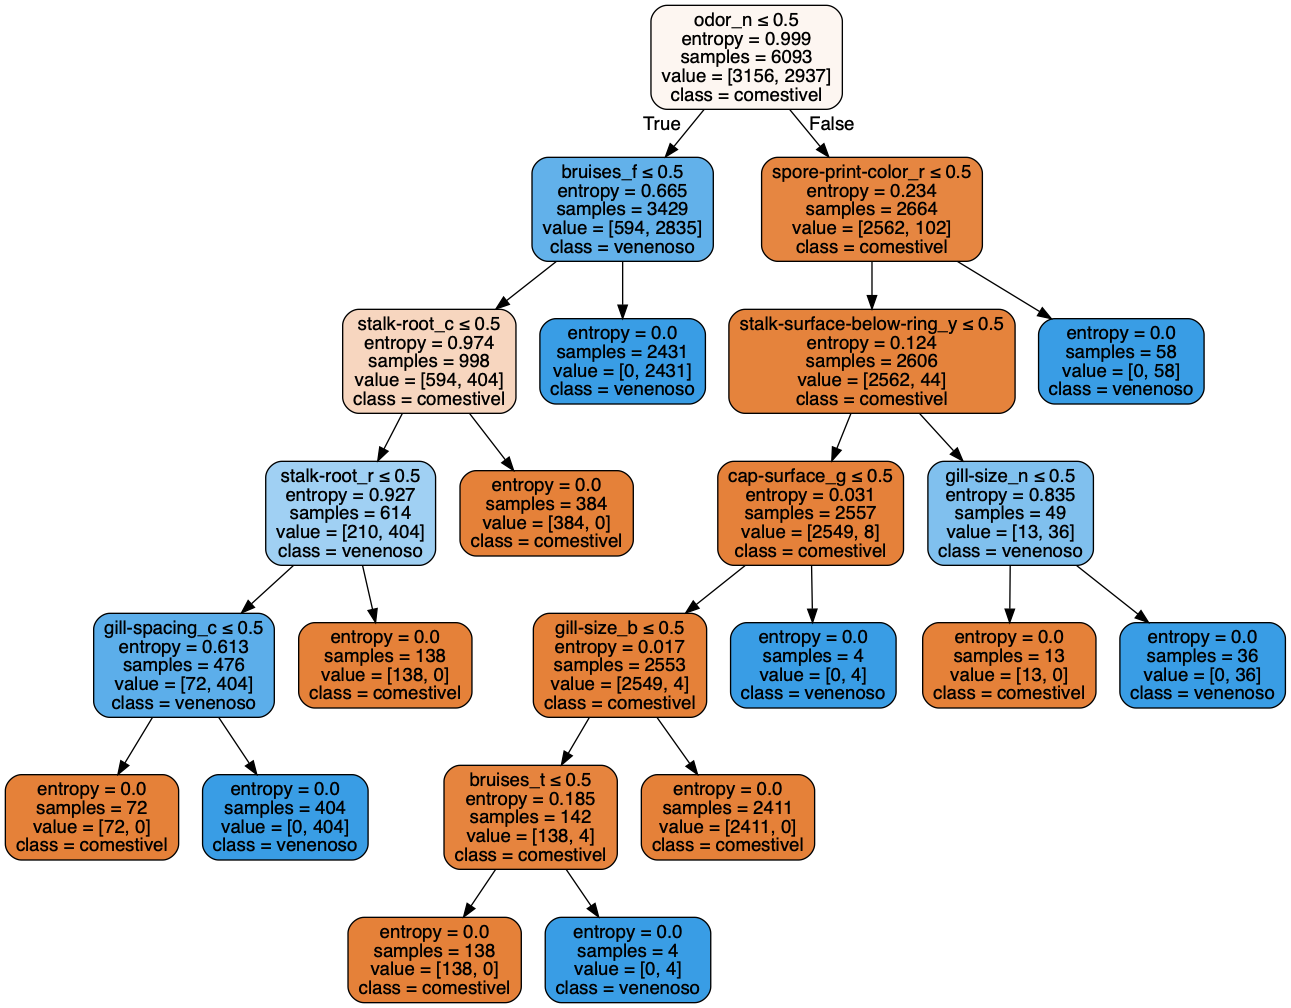

In [80]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                class_names=['comestivel','venenoso'],
                feature_names=pd.get_dummies(X_df).columns.values)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Agors sim. Com a visualização da árvore, podemos perceber quais critérios são mais relevantes para a classificação final do cogumelo. Sendo nesse primeiro nível, a característica mais importante o odor expelido.
No caso, __odor_n__ representa a ausencia de odor, sendo essa característica binária, 1 ou 0, temo que 1 representaria que o cogumelo em questão __NÃO__ tem odor. Ou seja, caso o cogumelo não tenha odor, a condição seria falsa, prosseguindo para o ramo à direita. Caso o mesmo tenha odor, ele partiria para o ramo à esquerda.

### Relatório de Classificação

Podemos utilizar da função __classification_report__ disponibilizada pela biblioteca do Scikit-learn para visualizar de forma geral os dados do nosso modelo.

In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1052
           p       1.00      1.00      1.00       979

   micro avg       1.00      1.00      1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



### Validação Cruzada

A validação cruzada (K-Fold) é uma técnica amplamente utilizada para avaliar a capacidade de generalização de um modelo cujo foco é a previsão, ou no nosso caso, classificação.

A imagem abaixo exemplifica como funcionaria uma validação cruzada de 5 iterações.

![exemplo de k-fold](https://3gp10c1vpy442j63me73gy3s-wpengine.netdna-ssl.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-21-at-4.26.53-PM.png)
*Fonte(https://www.datarobot.com/wiki/cross-validation/)*

Mais uma vez, usaremos uma funçao do Scikit-learn para a realização dessa etapa.

In [91]:
from sklearn.model_selection import cross_val_score

In [92]:
nclf = DecisionTreeClassifier(criterion='entropy')
accs = cross_val_score(nclf,X,y,cv=200,verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.3s finished


No trecho acima, utilizamos de uma nova árvore configurada igual a primeira, e também utilizamos da função __cross_val_score__ dividindo nosso conjunto em 200 partes igual para realizar os testes.

In [95]:
print("Média: " + str(accs.mean()))
print("Desvio padrão: " + str(accs.std()))

Média: 1.0
Desvio padrão: 0.0


Como nosso modelo está extremamente assertivo, podemos ver que não há nenhum erro através do desvio padrão nulo.

### Explorando a validação cruzada

Nessa seção iremos explorar um pouco a validação cruzada alterando alguns dos seus parâmetros e também na configuração da nossa árvore de decisões.

A validação abaixo utiliza apenas de 50 iterações de validações:

In [100]:
accs_50 = cross_val_score(nclf,X,y,cv=50,verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished


In [103]:
print("Média: " + str(accs_50.mean()))
print("Desvio padrão: " + str(accs_50.std()))

Média: 0.9997530864197531
Desvio padrão: 0.0017283950617284027


Podemos reparar que para 50 interações existe alguma variação dos conjuntos de testes para o treinamento. É extremamente importante ressaltar que isso raramente seria notado sem a ajuda da validação cruzada.

### Explorando a profundidade das árvores

In [38]:
clf_1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf_1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
y_pred = clf_1.predict(X_test)
accuracy_score(y_test, y_pred)

0.8847858197932054

In [40]:
clf_2 = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf_2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
y_pred = clf_2.predict(X_test)
accuracy_score(y_test, y_pred)

0.931068439192516

In [42]:
clf_3 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf_3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
y_pred = clf_3.predict(X_test)
accuracy_score(y_test, y_pred)

0.9650418513047759

In [44]:
clf_4 = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf_4.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
y_pred = clf_4.predict(X_test)
accuracy_score(y_test, y_pred)

0.9896602658788775

In [46]:
clf_5 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf_5.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
y_pred = clf_5.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

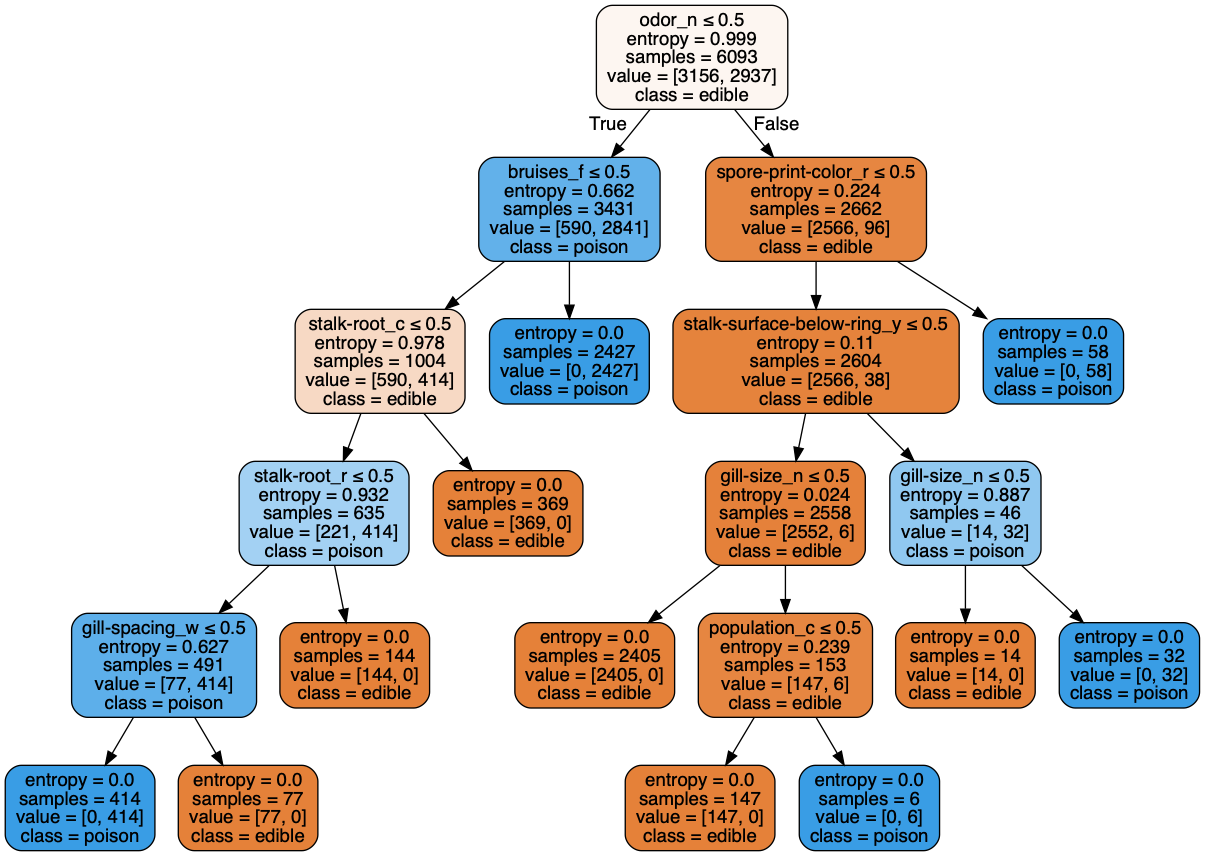

In [48]:
dot_data = StringIO()
export_graphviz(clf_5, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                class_names=['edible','poison'],
                feature_names=pd.get_dummies(X_df).columns.values)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [49]:
clf_6 = DecisionTreeClassifier(criterion='entropy', max_depth=6)
clf_6.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
y_pred = clf_6.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [51]:
clf_t = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=True, splitter='random')
clf_t.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=True,
            splitter='random')

In [52]:
print("CLF_2: " +  str(accuracy_score(y_test, clf_2.predict(X_test))))
print("CLF_T: " +  str(accuracy_score(y_test, clf_t.predict(X_test))))


CLF_2: 0.931068439192516
CLF_T: 0.9561792220580995


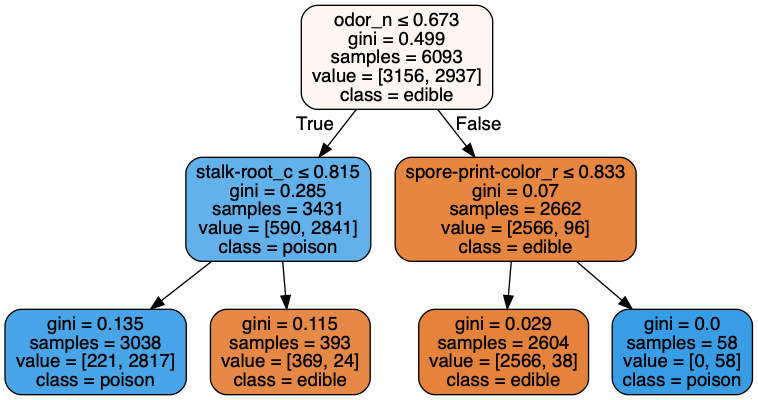

In [53]:
dot_data = StringIO()
export_graphviz(clf_t, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                class_names=['edible','poison'],
                feature_names=pd.get_dummies(X_df).columns.values)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# GridSearch from Scikitlearn

In [117]:
from sklearn.model_selection import GridSearchCV

In [121]:
gs = GridSearchCV(estimator=clf_6, param_grid=None ,cv=5)

TypeError: 'NoneType' object is not iterable